In [1]:
import numpy as np
import pandas as pd
import statistics as st
import math as m

#tell matplotlib to show charts in the notebook (rather than in a separate window)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# List of columns I want to look at
# I figured that most of the relevant columns would be names, cities, states, specialty, paying companies, total
#amounts, and number of payments
# I especially wanted to focus on payment amounts, number of payments, and specialties across all 3 major cities
col_list = ['physician_first_name','physician_middle_name',\
            'physician_last_name', 'recipient_city',\
            'recipient_state', 'physician_specialty',\
            'submitting_applicable_manufacturer_or_applicable_gpo_name',\
            'total_amount_of_payment_usdollars',\
            'date_of_payment','number_of_payments_included_in_total_amount']
# Uploading CSV File with specific column list
# Payments of physicians from top 3 populous U.S. cities (New York, Los Angeles, Chicago)
payments = pd.read_csv('Payment_Data_Top3_Cities.csv', usecols=col_list)
payments

,physician_first_name,physician_middle_name,physician_last_name,recipient_city,recipient_state,physician_specialty,submitting_applicable_manufacturer_or_applicable_gpo_name,total_amount_of_payment_usdollars,date_of_payment,number_of_payments_included_in_total_amount
0,WENDY,NaN,LONG,NEW YORK,NY,Allopathic & Osteopathic Physicians|Dermatology,Mission Pharmacal Company,12.60,02/14/2020,1
1,GEETHA,NaN,PUTHENVEETIL,LOS ANGELES,CA,Allopathic & Osteopathic Physicians|Pediatrics...,"Acceleron Pharma, Inc.",4720.00,06/30/2020,1
2,SUJIT,NaN,SHETH,NEW YORK,NY,Allopathic & Osteopathic Physicians|Pediatrics...,"Acceleron Pharma, Inc.",5900.00,06/30/2020,1
3,SUJIT,NaN,SHETH,NEW YORK,NY,Allopathic & Osteopathic Physicians|Pediatrics...,"Acceleron Pharma, Inc.",40.00,06/30/2020,2
4,GEETHA,NaN,PUTHENVEETIL,LOS ANGELES,CA,Allopathic & Osteopathic Physicians|Pediatrics...,"Acceleron Pharma, Inc.",40.00,06/30/2020,2
...,...,...,...,...,...,...,...,...,...,...
174782,SEAN,P,PINNEY,NEW YORK,NY,Allopathic & Osteopathic Physicians|Internal M...,Abbott Laboratories,1000.00,09/14/2020,1
174783,PALMER,Q,BESSEY,NEW YORK,NY,Allopathic & Osteopathic Physicians|Surgery,Mallinckrodt Hospital Products Inc.,7150.00,08/25/2020,1
174784,TIMOTHY,JUSTIN,GILLENWATER,LOS ANGELES,CA,Allopathic & Osteopathic Physicians|Surgery|Pl...,Mallinckrodt Hospital Products Inc.,4000.00,02/11/2020,1
174785,TIMOTHY,JUSTIN,GILLENWATER,LOS ANGELES,CA,Allopathic & Osteopathic Physicians|Surgery|Pl...,Mallinckrodt Hospital Products Inc.,794.10,02/11/2020,1


In [3]:
# Let's see how many different unique physician specialties there are
specialty_count = pd.value_counts(payments.physician_specialty)
specialty_count
# There's 215 specialties... maybe I should look at the top 20? 30?

Allopathic & Osteopathic Physicians|Internal Medicine                                                  25760
Allopathic & Osteopathic Physicians|Dermatology                                                         9331
Allopathic & Osteopathic Physicians|Internal Medicine|Cardiovascular Disease                            8979
Allopathic & Osteopathic Physicians|Family Medicine                                                     7982
Allopathic & Osteopathic Physicians|Internal Medicine|Gastroenterology                                  7930
                                                                                                       ...  
Allopathic & Osteopathic Physicians|Ophthalmology|Pediatric Ophthalmology and Strabismus Specialist        1
Allopathic & Osteopathic Physicians|Medical Genetics|Molecular Genetic Pathology                           1
Allopathic & Osteopathic Physicians|Pathology|Immunopathology                                              1
Allopathic & Osteop

In [4]:
# Let's try looking at the top 20 specialties with the top 20 total amount of times paid
top20_specialties = payments.physician_specialty.value_counts().nlargest(20)
top20_specialties
# These specialties received the most amount of payments between the 3 top major U.S. cities
# But these don't necessarily mean that these specialties are the top 20 most paid

Allopathic & Osteopathic Physicians|Internal Medicine                                         25760
Allopathic & Osteopathic Physicians|Dermatology                                                9331
Allopathic & Osteopathic Physicians|Internal Medicine|Cardiovascular Disease                   8979
Allopathic & Osteopathic Physicians|Family Medicine                                            7982
Allopathic & Osteopathic Physicians|Internal Medicine|Gastroenterology                         7930
Allopathic & Osteopathic Physicians|Psychiatry & Neurology|Neurology                           6779
Allopathic & Osteopathic Physicians|Internal Medicine|Hematology & Oncology                    6188
Allopathic & Osteopathic Physicians|Psychiatry & Neurology|Psychiatry                          4977
Allopathic & Osteopathic Physicians|Ophthalmology                                              4870
Allopathic & Osteopathic Physicians|Orthopaedic Surgery                                        4819


<AxesSubplot:title={'center':'Top 5 Specialties by Cumulative Total Payments (Millions of USD)'}, ylabel='Physician Specialty'>

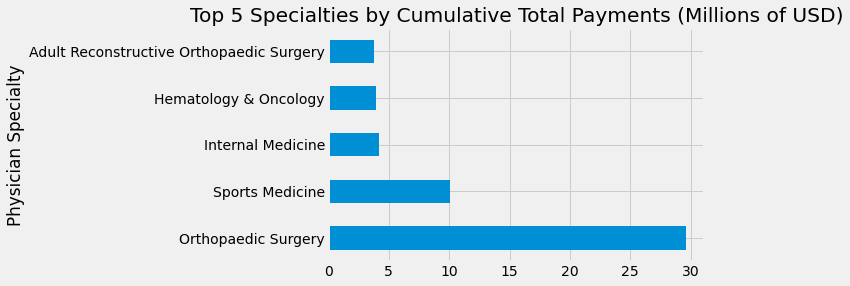

In [5]:
col_list = ['physician_specialty', 'submitting_applicable_manufacturer_or_applicable_gpo_name',\
            'total_amount_of_payment_usdollars']
# Dataframe
pay_spec_totalamt = pd.read_csv('Payment_Data_Top3_Cities.csv', usecols=col_list)
pay_spec_totalamt = pay_spec_totalamt.dropna(subset=['physician_specialty', 'total_amount_of_payment_usdollars',\
                                                    'submitting_applicable_manufacturer_or_applicable_gpo_name'])
pay_spec_totalamt['physician_specialty'] = pay_spec_totalamt.physician_specialty.apply(lambda x: x.split("|")[-1])
pay_spec_totalamt

# Visualization 1
alpha = pay_spec_totalamt.groupby(['physician_specialty']).sum().nlargest(5, 'total_amount_of_payment_usdollars')\
/1000000
pay_spec_totalamt_plot=alpha.plot.barh(xlabel="Physician Specialty",\
                   title="Top 5 Specialties by Cumulative Total Payments (Millions of USD)", legend=None)
pay_spec_totalamt_plot

<AxesSubplot:title={'center':'Top 5 Specialties by Average Total Payments (Thousands USD)'}, ylabel='Physician Specialty'>

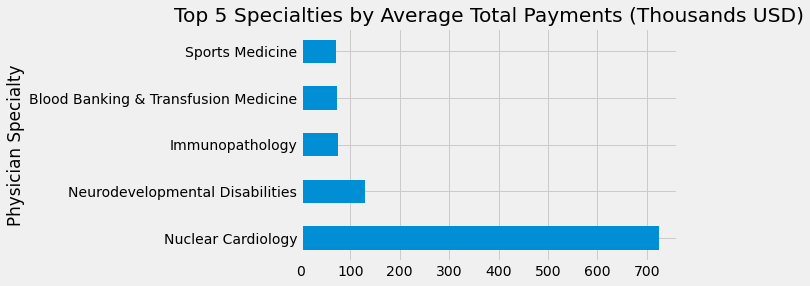

In [6]:
# Visualization 2
beta = pay_spec_totalamt.groupby(['physician_specialty']).mean().nlargest(5, 'total_amount_of_payment_usdollars')\
/100
pay_spec_totalamt_plot_2=beta.plot.barh(xlabel="Physician Specialty",\
                   title="Top 5 Specialties by Average Total Payments (Thousands USD)", legend=None)
pay_spec_totalamt_plot_2